In [ ]:
from google.colab import drive
drive.mount("/content/drive") 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/FIRE/train.csv')
model_dir = '/content/drive/MyDrive/FIRE/'
df2=pd.read_csv('/content/drive/MyDrive/FIRE/test.csv')
df3=pd.read_csv('/content/drive/MyDrive/FIRE/test_with_ans_and_split.csv')

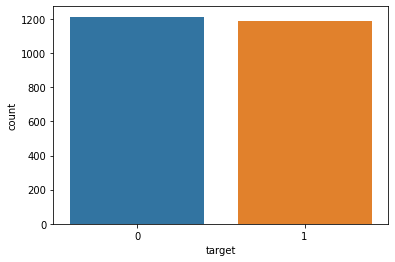

In [ ]:
import seaborn as sns
sns.countplot(x='target', data=df) 

In [ ]:
df['target'].value_counts()

0    1213
1    1187
Name: target, dtype: int64

In [ ]:
train_tweets = df['tweet'].tolist()
train_labels = df['target'].tolist()

In [ ]:
test_tweets = df2['tweet'].tolist()
test_labels = df3['target'].tolist()

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,roc_auc_score

from sklearn.linear_model import  LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


tfidf = TfidfVectorizer()
train_tf=tfidf.fit_transform(train_tweets)
test_tf=tfidf.transform(test_tweets)
kf=KFold(n_splits=5, random_state=42, shuffle=True)
f1=make_scorer(f1_score, average='weighted')


In [ ]:
SVM = svm.LinearSVC(probability,=True,random_state=42)
parameters = { 'C':[0.1,1, 10]}
clf1=GridSearchCV(SVM,param_grid = parameters,scoring=f1,cv = kf)
clf1.fit(train_tf,train_labels)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=42, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None, param_grid={'C': [0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score, average=weighted), verbose=0)

In [ ]:
print(f1_score(test_labels, clf1.predict(test_tf), average='weighted'), roc_auc_score(test_labels, clf1.decision_function(test_tf)))

0.8036855562360855 0.8925498873750954


In [ ]:
lr = LogisticRegression(random_state=42)
parameters = { 'warm_start':[True,False]}
clf2=GridSearchCV(lr,param_grid = parameters,scoring=f1,cv = kf)
clf2.fit(train_tf,train_labels)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'warm_start': [True, False]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False,
             scoring=make_scorer(f1_score, average=weighted), verbose=0)

In [ ]:
print(f1_score(test_labels, clf2.predict(test_tf), average='weighted'), roc_auc_score(test_labels, clf2.decision_function(test_tf)))

0.8038675434428881 0.892751652989604


In [ ]:
RFC=RandomForestClassifier(random_state=42)
parameters = { 'n_estimators':[50,100,200],'max_features':['log2','sqrt']}
clf3=GridSearchCV(RFC,param_grid = parameters,scoring=f1,cv = kf)
clf3.fit(train_tf,train_labels)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_scor

In [ ]:
print(f1_score(test_labels, clf3.predict(test_tf), average='weighted'), roc_auc_score(test_labels, clf3.predict_proba(test_tf)[:,1]))

0.7899730986177401 0.8390075777872597


In [ ]:
lr=LogisticRegression()
clf=make_pipeline(TfidfVectorizer(),lr)
cross_val_score(clf,train_tweets, train_labels,scoring=f1, cv=kf)

array([0.82406505, 0.81644368, 0.84776346, 0.83746897, 0.84495393])

In [ ]:
svc=svm.LinearSVC()
clf=make_pipeline(TfidfVectorizer(),svc)
cross_val_score(clf,train_tweets, train_labels,scoring=f1, cv=kf)

array([0.83485529, 0.80410546, 0.83746037, 0.82088316, 0.83507102])

In [ ]:
rf=RandomForestClassifier()
clf=make_pipeline(TfidfVectorizer(),rf)
cross_val_score(clf,train_tweets, train_labels,scoring=f1, cv=kf)

array([0.81199069, 0.79375448, 0.83101805, 0.829229  , 0.81652288])